Step 1: Python Setup

In [2]:
import psycopg2
import pandas as pd
from getpass import getpass
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# PostgreSQL connection
password = getpass("Enter Postgres password: ")

conn = psycopg2.connect(
    dbname="olist_ecommerce",
    user="postgres",
    password=password,
    host="127.0.0.1",
    port=5432
)


In [4]:
# Test query
df = pd.read_sql("SELECT * FROM customer_orders_fact LIMIT 5;", conn)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_47360\2901034097.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM customer_orders_fact LIMIT 5;", conn)


,customer_id,customer_unique_id,customer_city,customer_state,total_orders,total_items,total_spent,first_order_date,last_order_date,average_order_value,average_review_score
0,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1,8,109312.64,2017-09-29 15:24:52,2017-09-29 15:24:52,109312.64,1.0
1,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,GO,1,20,45256.00,2017-08-23 09:22:34,2017-08-23 09:22:34,45256.00,NaN
2,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,1,20,44048.00,2018-02-22 15:30:41,2018-02-22 15:30:41,44048.00,1.0
3,05455dfa7cd02f13d132aa7a6a9729c6,4007669dec559734d6f53e029e360987,divinopolis,MG,1,6,36489.24,2017-11-24 11:03:35,2017-11-24 11:03:35,36489.24,1.0
4,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,rio de janeiro,RJ,1,10,30186.00,2018-04-19 13:54:06,2018-04-19 13:54:06,30186.00,5.0


In [5]:
# Preview
display(df)
print("\nSchema & dtypes:")
print(df.dtypes)

,customer_id,customer_unique_id,customer_city,customer_state,total_orders,total_items,total_spent,first_order_date,last_order_date,average_order_value,average_review_score
0,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1,8,109312.64,2017-09-29 15:24:52,2017-09-29 15:24:52,109312.64,1.0
1,bd5d39761aa56689a265d95d8d32b8be,698e1cf81d01a3d389d96145f7fa6df8,goiania,GO,1,20,45256.00,2017-08-23 09:22:34,2017-08-23 09:22:34,45256.00,NaN
2,be1b70680b9f9694d8c70f41fa3dc92b,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,1,20,44048.00,2018-02-22 15:30:41,2018-02-22 15:30:41,44048.00,1.0
3,05455dfa7cd02f13d132aa7a6a9729c6,4007669dec559734d6f53e029e360987,divinopolis,MG,1,6,36489.24,2017-11-24 11:03:35,2017-11-24 11:03:35,36489.24,1.0
4,1ff773612ab8934db89fd5afa8afe506,ef8d54b3797ea4db1d63f0ced6a906e9,rio de janeiro,RJ,1,10,30186.00,2018-04-19 13:54:06,2018-04-19 13:54:06,30186.00,5.0



Schema & dtypes:
customer_id                     object
customer_unique_id              object
customer_city                   object
customer_state                  object
total_orders                     int64
total_items                      int64
total_spent                    float64
first_order_date        datetime64[ns]
last_order_date         datetime64[ns]
average_order_value            float64
average_review_score           float64
dtype: object


In [6]:
# shape, missing values, and basic stats
df_full = pd.read_sql("SELECT * FROM customer_orders_fact;", conn)
print("Shape:", df_full.shape)
print("\nNull counts:")
print(df_full.isnull().sum())
print("\nSummary stats for numeric columns:")
display(df_full.describe(include='number').T)


C:\Users\user\AppData\Local\Temp\ipykernel_47360\340724587.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_full = pd.read_sql("SELECT * FROM customer_orders_fact;", conn)


Shape: (99441, 11)

Null counts:
customer_id                0
customer_unique_id         0
customer_city              0
customer_state             0
total_orders               0
total_items                0
total_spent                0
first_order_date           0
last_order_date            0
average_order_value        0
average_review_score    1274
dtype: int64

Summary stats for numeric columns:


,count,mean,std,min,25%,50%,75%,max
total_orders,99441.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
total_items,99441.0,1.185960,0.749975,0.0,1.00,1.00,1.00,63.00
total_spent,99441.0,206.411439,622.017303,0.0,62.82,109.89,196.12,109312.64
average_order_value,99441.0,206.411439,622.017303,0.0,62.82,109.89,196.12,109312.64
average_review_score,98167.0,4.089032,1.345035,1.0,4.00,5.00,5.00,5.00


Step 2: Compute Recency

In [7]:
# parse dates, compute analysis_date and recency
df_full['first_order_date'] = pd.to_datetime(df_full['first_order_date'])
df_full['last_order_date'] = pd.to_datetime(df_full['last_order_date'])

In [8]:
# Use dataset's last order date, not today's date
analysis_date = df_full['last_order_date'].max()
print("Analysis (reference) date:", analysis_date)

Analysis (reference) date: 2018-10-17 17:30:18


In [9]:
df_full['recency'] = (analysis_date - df_full['last_order_date']).dt.days
print("\nRecency stats:")
print(df_full['recency'].describe())


Recency stats:
count    99441.000000
mean       289.900192
std        153.667316
min          0.000000
25%        166.000000
50%        271.000000
75%        400.000000
max        772.000000
Name: recency, dtype: float64


In [10]:
# Show a few customers with recency, frequency, monetary columns
df_preview_rfm = df_full[['customer_id','total_orders','total_items','total_spent','last_order_date','recency']].head(10)
display(df_preview_rfm)

,customer_id,total_orders,total_items,total_spent,last_order_date,recency
0,1617b1357756262bfa56ab541c47bc16,1,8,109312.64,2017-09-29 15:24:52,383
1,bd5d39761aa56689a265d95d8d32b8be,1,20,45256.00,2017-08-23 09:22:34,420
2,be1b70680b9f9694d8c70f41fa3dc92b,1,20,44048.00,2018-02-22 15:30:41,237
3,05455dfa7cd02f13d132aa7a6a9729c6,1,6,36489.24,2017-11-24 11:03:35,327
4,1ff773612ab8934db89fd5afa8afe506,1,10,30186.00,2018-04-19 13:54:06,181
5,ec5b2ba62e574342386871631fafd3fc,1,4,29099.52,2018-07-15 14:49:44,94
6,e7d6802668de6e74d0d6c56565bf2a24,1,10,22346.60,2017-10-02 15:49:23,380
7,8c20d9bfbc96c5d39025d77a3ba83d7f,1,11,21874.05,2018-02-01 18:32:02,257
8,f7622098214b4634b7fe7eee269b5426,1,6,19457.04,2018-06-01 19:08:41,137
9,71901689c5f3e5adc27b1dd16b33f0b8,1,6,19174.38,2018-05-22 13:43:23,148


Step 3: RFM Computation

In [11]:
# prepare RFM table
rfm = df_full[['customer_id','recency','total_orders','total_spent']].copy()
rfm.rename(columns={'total_orders':'frequency','total_spent':'monetary'}, inplace=True)

In [12]:
print("RFM shape:", rfm.shape)
print("\nRFM nulls:")
print(rfm.isnull().sum())

RFM shape: (99441, 4)

RFM nulls:
customer_id    0
recency        0
frequency      0
monetary       0
dtype: int64


In [13]:
# Check RFM table
print("RFM Table Preview:")
display(rfm.head())

RFM Table Preview:


,customer_id,recency,frequency,monetary
0,1617b1357756262bfa56ab541c47bc16,383,1,109312.64
1,bd5d39761aa56689a265d95d8d32b8be,420,1,45256.00
2,be1b70680b9f9694d8c70f41fa3dc92b,237,1,44048.00
3,05455dfa7cd02f13d132aa7a6a9729c6,327,1,36489.24
4,1ff773612ab8934db89fd5afa8afe506,181,1,30186.00


In [14]:
print("\nRFM Summary Stats:")
display(rfm.describe().T[['mean','50%','std','min','max']])


RFM Summary Stats:


,mean,50%,std,min,max
recency,289.900192,271.00,153.667316,0.0,772.00
frequency,1.000000,1.00,0.000000,1.0,1.00
monetary,206.411439,109.89,622.017303,0.0,109312.64


Step 4: KMeans clustering


In [15]:
# Copy RFM
rfm_clust = rfm[['recency','frequency','monetary']].copy()

# Log-transform monetary to reduce outlier effect
rfm_clust['monetary'] = np.log1p(rfm_clust['monetary'])

In [16]:
# Scale features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clust)

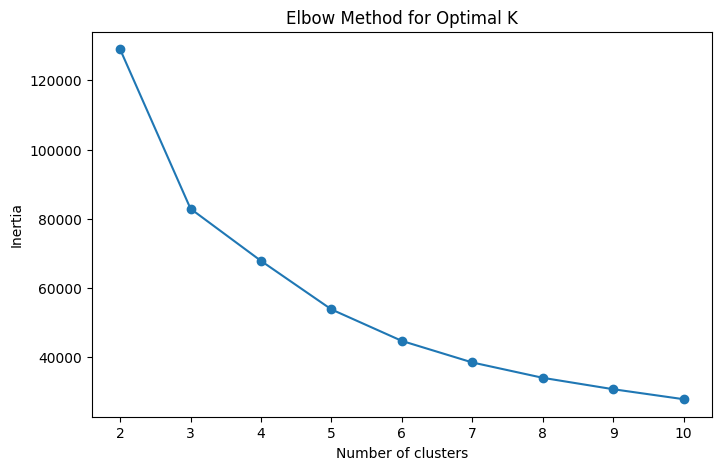

In [29]:
# Determine Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('../assets/elbow_method.png', bbox_inches='tight', dpi=300)
plt.show()

In [18]:
# Choose K (e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [19]:
# Preview
display(rfm[['customer_id','recency','frequency','monetary','Cluster']].head())

,customer_id,recency,frequency,monetary,Cluster
0,1617b1357756262bfa56ab541c47bc16,383,1,109312.64,2
1,bd5d39761aa56689a265d95d8d32b8be,420,1,45256.00,2
2,be1b70680b9f9694d8c70f41fa3dc92b,237,1,44048.00,2
3,05455dfa7cd02f13d132aa7a6a9729c6,327,1,36489.24,2
4,1ff773612ab8934db89fd5afa8afe506,181,1,30186.00,2


In [20]:
# Inspect cluster size
rfm['Cluster'].value_counts()


Cluster
1    37628
3    23598
2    20904
0    17311
Name: count, dtype: int64

In [21]:
# Profile clusters
rfm.groupby('Cluster')[['recency','frequency','monetary']].mean()


,recency,frequency,monetary
Cluster,,,
0,462.072902,1.0,293.568968
1,174.130010,1.0,83.782490
2,200.057262,1.0,513.918174
3,427.784558,1.0,65.610409


In [22]:
# Map segment numbers to meaningful labels (you can adjust after inspecting cluster stats)
segment_map = {
    0: 'At-Risk',
    1: 'Loyal Customers',
    2: 'Champions',
    3: 'Dormant'
}
rfm['segment_label'] = rfm['Cluster'].map(segment_map)


In [23]:
# Assign “No Purchase / Lead” for monetary = 0
rfm.loc[rfm['monetary'] == 0, 'segment_label'] = 'No Purchase / Lead'


In [24]:
print(rfm)

                            customer_id  recency  frequency   monetary  \
0      1617b1357756262bfa56ab541c47bc16      383          1  109312.64   
1      bd5d39761aa56689a265d95d8d32b8be      420          1   45256.00   
2      be1b70680b9f9694d8c70f41fa3dc92b      237          1   44048.00   
3      05455dfa7cd02f13d132aa7a6a9729c6      327          1   36489.24   
4      1ff773612ab8934db89fd5afa8afe506      181          1   30186.00   
...                                 ...      ...        ...        ...   
99436  a790343ca6f3fee08112d678b43aa7c5       52          1       9.59   
99437  86dc2ffce2dfff336de2f386a786e574      762          1       0.00   
99438  a73c1f73f5772cf801434bf984b0b1a7       44          1       0.00   
99439  197a2a6a77da93f678ea0d379f21da0a       49          1       0.00   
99440  3532ba38a3fd242259a514ac2b6ae6b6       50          1       0.00   

       Cluster       segment_label  
0            2           Champions  
1            2           Champions  


In [25]:
rfm_df = pd.DataFrame(rfm)

In [26]:
rfm_df

,customer_id,recency,frequency,monetary,Cluster,segment_label
0,1617b1357756262bfa56ab541c47bc16,383,1,109312.64,2,Champions
1,bd5d39761aa56689a265d95d8d32b8be,420,1,45256.00,2,Champions
2,be1b70680b9f9694d8c70f41fa3dc92b,237,1,44048.00,2,Champions
3,05455dfa7cd02f13d132aa7a6a9729c6,327,1,36489.24,2,Champions
4,1ff773612ab8934db89fd5afa8afe506,181,1,30186.00,2,Champions
...,...,...,...,...,...,...
99436,a790343ca6f3fee08112d678b43aa7c5,52,1,9.59,1,Loyal Customers
99437,86dc2ffce2dfff336de2f386a786e574,762,1,0.00,3,No Purchase / Lead
99438,a73c1f73f5772cf801434bf984b0b1a7,44,1,0.00,1,No Purchase / Lead
99439,197a2a6a77da93f678ea0d379f21da0a,49,1,0.00,1,No Purchase / Lead


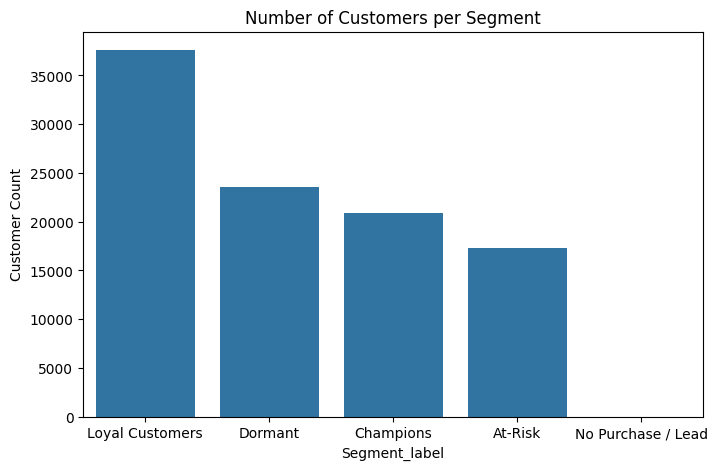

In [27]:
# Count of customers per segment
segment_counts = rfm['segment_label'].value_counts()
sorted_segments = segment_counts.index.tolist()  # segments sorted by count descending

plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='segment_label', order=sorted_segments)
plt.title("Number of Customers per Segment")
plt.ylabel("Customer Count")
plt.xlabel("Segment_label")
plt.savefig('../assets/customers_per_segment.png', bbox_inches='tight', dpi=300)
plt.show()


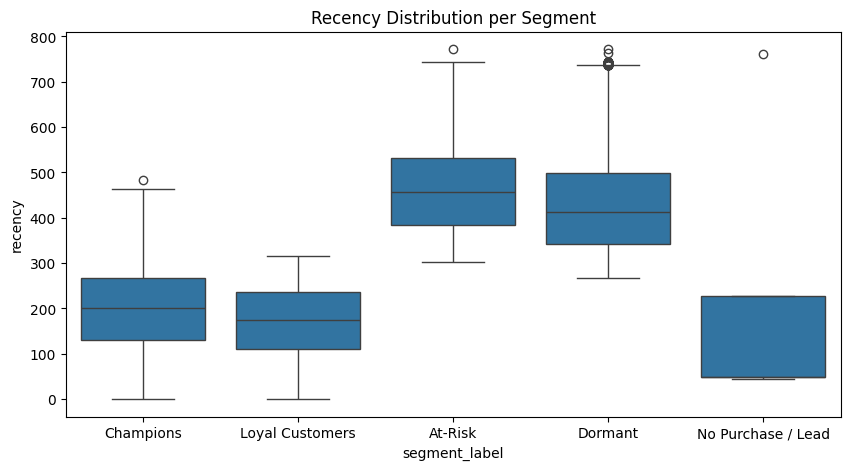

In [28]:
# Recency distribution per segment
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm, x='segment_label', y='recency', order=['Champions','Loyal Customers','At-Risk','Dormant', 'No Purchase / Lead'])
plt.title("Recency Distribution per Segment")
plt.savefig('../assets/recency_dist_per_segment.png', bbox_inches='tight', dpi=300)
plt.show()

Step 5: Export DataFrame to CSV

In [45]:
rfm_df.to_csv("../data/processed/rfm_marketing_segments.csv", index=False)

print("CSV file 'rfm_marketing_segments.csv' created successfully!")


CSV file 'rfm_marketing_segments.csv' created successfully!
